In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error,mean_absolute_error
from datetime import datetime

In [24]:
# Load the daily minimum temperatures dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


C:\Users\Adhithya J\AppData\Local\Temp\ipykernel_12428\1537559293.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


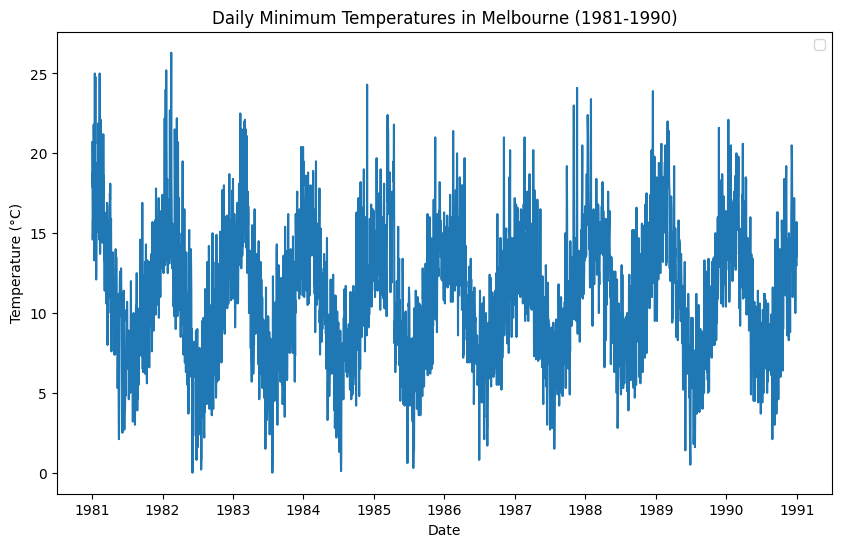

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Daily Minimum Temperatures in Melbourne (1981-1990)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [7]:
train_size=int(len(data)*0.8)
train,test=data[:train_size],data[train_size:]
print(f'Train size: {len(train)}, Test size: {len(test)}')

Train size: 2920, Test size: 730


In [9]:
model=ARIMA(train,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 2920
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6786.315
Date:                Wed, 07 May 2025   AIC                          13578.630
Time:                        05:36:00   BIC                          13596.567
Sample:                             0   HQIC                         13585.091
                               - 2920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4579      0.019     23.604      0.000       0.420       0.496
ma.L1         -0.9216      0.009   -101.453      0.000      -0.939      -0.904
sigma2         6.1197      0.150     40.839      0.0

In [12]:
forecast_steps=len(test)
forecast=model_fit.forecast(steps=forecast_steps)
forecast.index=test.index

c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
mae=mean_absolute_error(test,forecast)
mse=mean_squared_error(test,forecast)
rmse_value=rmse(test,forecast)
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse_value[0]:.3f}')

MAE: 4.316
MSE: 27.767
RMSE: 5.082


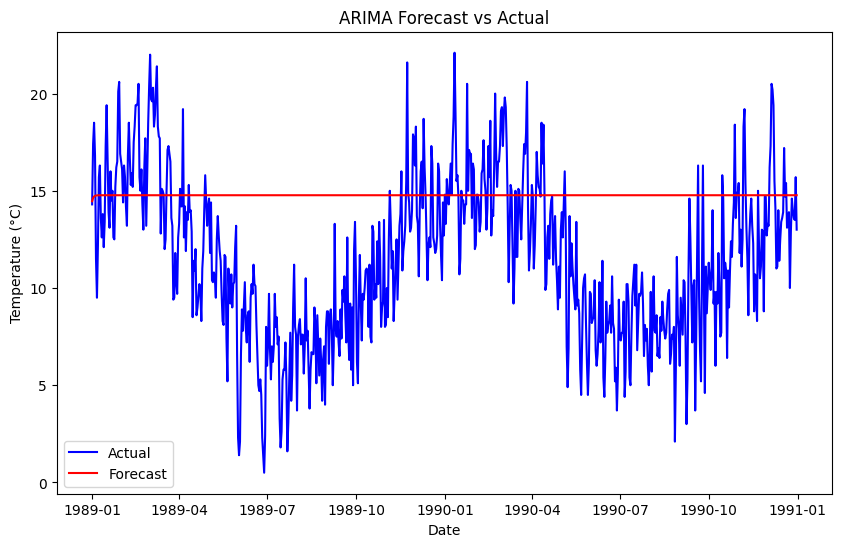

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(test.index,test, label='Actual', color='blue')
plt.plot(test.index,forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [20]:
future_steps=30
future_forecast = model_fit.forecast(steps=future_steps)
future_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


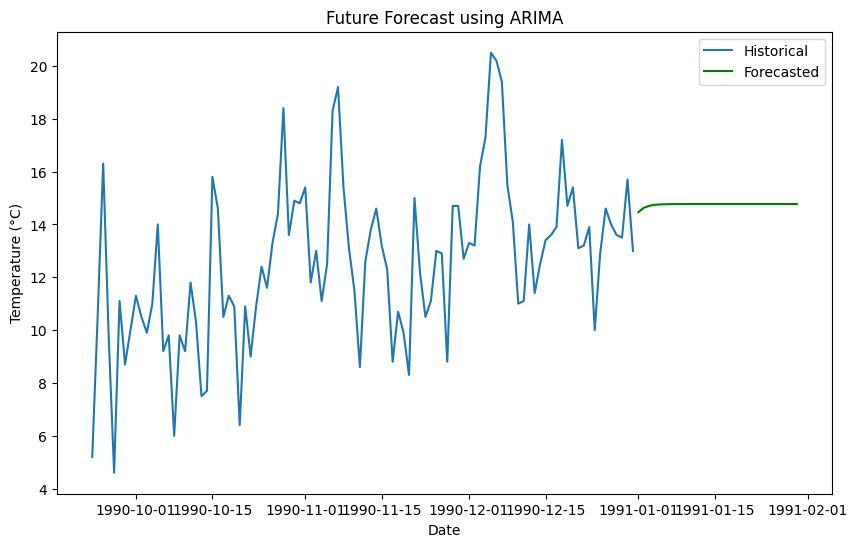

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-100:],data.iloc[-100:],label="Historical")
plt.plot(future_index,future_forecast,label="Forecasted",color="green")
plt.title('Future Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()